In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
# uncomment this block if loading data from local 
# List of file paths
# file_paths = [
#     '../Data/umsatzdaten_gekuerzt.csv',
#     '../Data/wetter.csv',
#     '../Data/kiwo.csv'
# ]

# # Use a list comprehension to read the CSV files into DataFrames
# dataframes = [pd.read_csv(file) for file in file_paths]

# # Optionally, you can assign them to specific variable names
# df_umsatz, df_wetter, df_kiwo = dataframes

In [ ]:
# load the data from URL
kiwo_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv'
umsatz_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv'
wetter_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv'

df_kiwo = pd.read_csv(kiwo_url)
df_umsatz = pd.read_csv(umsatz_url)
df_wetter = pd.read_csv(wetter_url)

In [11]:
# Merge df_umsatz with df_wetter on the 'date' column
df = pd.merge(df_umsatz, df_wetter, on='Datum', how='left')

# Merge the result with df_kiwo on the 'date' column
df = pd.merge(df, df_kiwo, on='Datum', how='left')

# Print the combined DataFrame
print(df)

           Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0     2013-07-01            1  148.828353         6.0     17.8375   
1     2013-07-02            1  159.793757         3.0     17.3125   
2     2013-07-03            1  111.885594         7.0     21.0750   
3     2013-07-04            1  168.864941         7.0     18.8500   
4     2013-07-05            1  171.280754         5.0     19.9750   
...          ...          ...         ...         ...         ...   
9329  2017-12-21            6   87.471228         7.0      6.2375   
9330  2017-12-22            6   71.911652         7.0      5.7625   
9331  2017-12-23            6   84.062223         7.0      7.8000   
9332  2017-12-24            6   60.981969         7.0      8.1125   
9333  2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  
0                    15.0        20.0          NaN  
1                    10.0         NaN          NaN  
2           

In [12]:
df.head()
df.tail()

# Convert 'Datum' to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Calculate descriptive statistics for numerical columns
descriptive_stats = df.describe()

print(descriptive_stats)


                               Datum  Warengruppe       Umsatz   Bewoelkung  \
count                           9334  9334.000000  9334.000000  9264.000000   
mean   2016-01-13 23:56:27.100921344     3.088172   206.749044     4.720747   
min              2013-07-01 00:00:00     1.000000     7.051201     0.000000   
25%              2014-10-12 00:00:00     2.000000    96.897441     3.000000   
50%              2016-01-10 00:00:00     3.000000   161.900831     6.000000   
75%              2017-04-22 00:00:00     4.000000   280.644663     7.000000   
max              2018-07-31 00:00:00     6.000000  1879.461831     8.000000   
std                              NaN     1.489002   144.545189     2.646273   

        Temperatur  Windgeschwindigkeit   Wettercode  KielerWoche  
count  9318.000000          9318.000000  7009.000000        223.0  
mean     12.028483            10.974780    36.900128          1.0  
min      -8.475000             3.000000     0.000000          1.0  
25%       6.2375

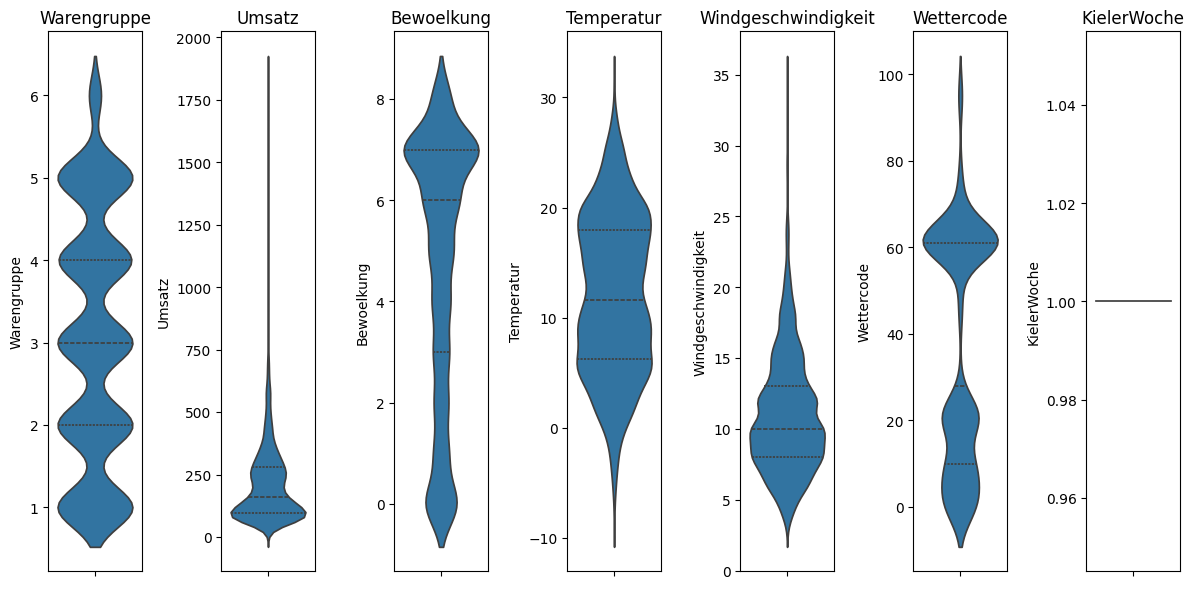

In [13]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots
num_columns = len(numeric_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(12, 6), sharey=False)

# Create a violin plot for each numeric column
for ax, column in zip(axes, numeric_columns):
    sns.violinplot(data=df[column], ax=ax, inner='quartile')
    ax.set_title(column)
    # ax.set_yscale('log')  # Set Y-axis to logarithmic scale
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [14]:
# Check for NaN
for column in df.columns:
    nan_count = df[column].isna().sum()
    print(f"Column '{column}' has {nan_count} NaN values.")

# infinite values
import numpy as np
print("Number of infinite values in 'Umsatz':", np.isinf(df['Umsatz']).sum())

Column 'Datum' has 0 NaN values.
Column 'Warengruppe' has 0 NaN values.
Column 'Umsatz' has 0 NaN values.
Column 'Bewoelkung' has 70 NaN values.
Column 'Temperatur' has 16 NaN values.
Column 'Windgeschwindigkeit' has 16 NaN values.
Column 'Wettercode' has 2325 NaN values.
Column 'KielerWoche' has 9111 NaN values.
Number of infinite values in 'Umsatz': 0


Number of NaN values in 'Umsatz': 0
Number of infinite values in 'Umsatz': 0


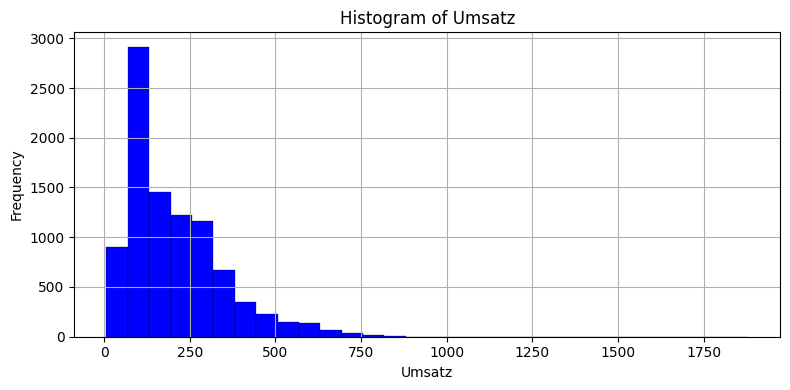

In [15]:
# Assuming df is already defined and contains the necessary columns

# Check for non-finite values in 'Umsatz'
print("Number of NaN values in 'Umsatz':", df['Umsatz'].isna().sum())
print("Number of infinite values in 'Umsatz':", np.isinf(df['Umsatz']).sum())

# Clean the data by dropping NaN and infinite values
df = df.dropna(subset=['Umsatz'])  # Drop NaN values
df = df[~np.isinf(df['Umsatz'])]   # Drop infinite values

# Plot histogram of 'Umsatz'
plt.figure(figsize=(8, 4))
plt.hist(df['Umsatz'], bins=30, color='blue', edgecolor='black', linewidth=0.2)
plt.title('Histogram of Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


c:\Users\Karolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9334.
  res = hypotest_fun_out(*samples, **kwds)


Column: Warengruppe, Shapiro-Wilk Test Statistic: 0.9100391773247408, p-value: 5.4336179699415235e-59
The distribution of Warengruppe does not appear to be normal (reject H0).


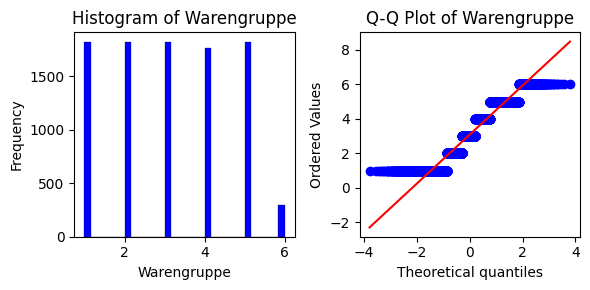

Column: Umsatz, Shapiro-Wilk Test Statistic: 0.8575895486016054, p-value: 5.837138447091226e-68
The distribution of Umsatz does not appear to be normal (reject H0).


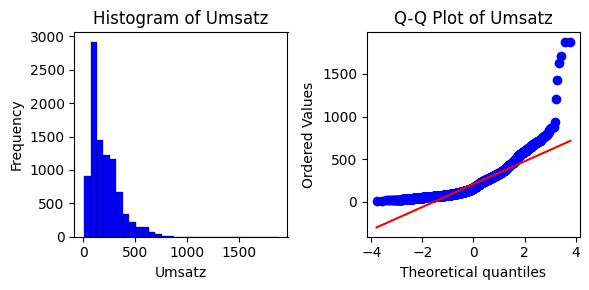

c:\Users\Karolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9264.
  res = hypotest_fun_out(*samples, **kwds)


Column: Bewoelkung, Shapiro-Wilk Test Statistic: 0.8577042206300988, p-value: 8.737876267851504e-68
The distribution of Bewoelkung does not appear to be normal (reject H0).


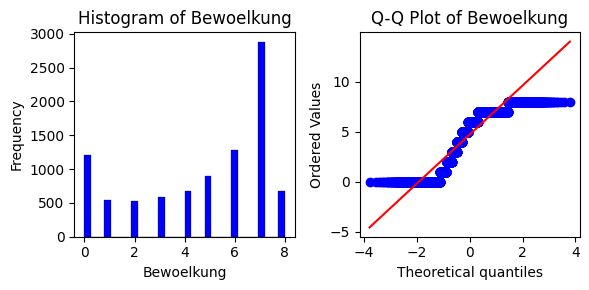

c:\Users\Karolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9318.
  res = hypotest_fun_out(*samples, **kwds)


Column: Temperatur, Shapiro-Wilk Test Statistic: 0.9858817477051792, p-value: 2.0436173236583194e-29
The distribution of Temperatur does not appear to be normal (reject H0).


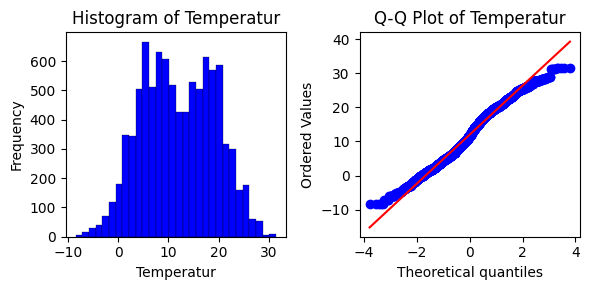

Column: Windgeschwindigkeit, Shapiro-Wilk Test Statistic: 0.9479660731827823, p-value: 4.0127454904078135e-49
The distribution of Windgeschwindigkeit does not appear to be normal (reject H0).


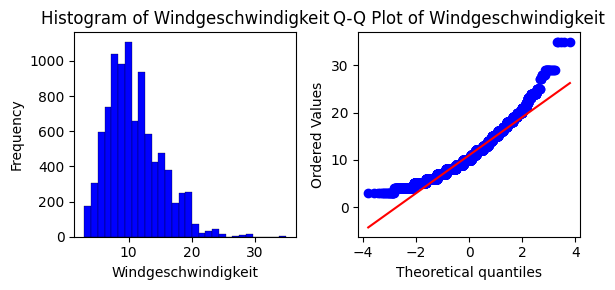

c:\Users\Karolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7009.
  res = hypotest_fun_out(*samples, **kwds)


Column: Wettercode, Shapiro-Wilk Test Statistic: 0.8389753013898319, p-value: 2.119890078915496e-64
The distribution of Wettercode does not appear to be normal (reject H0).


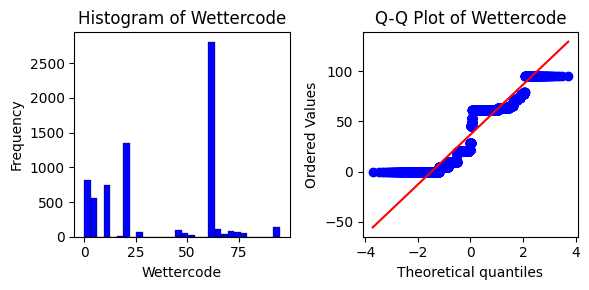

c:\Users\Karolina\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Column: KielerWoche, Shapiro-Wilk Test Statistic: 1.0, p-value: 1.0
The distribution of KielerWoche appears to be normal (fail to reject H0).


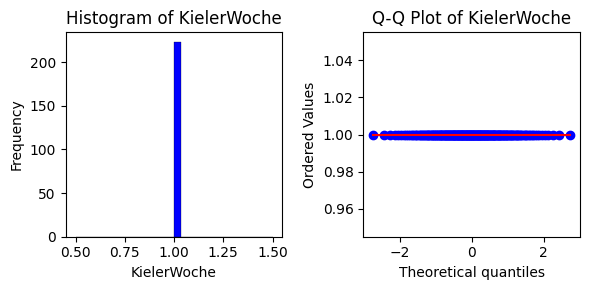

In [16]:
# Sample DataFrame for demonstration
# df = pd.DataFrame({
#     'A': np.random.normal(loc=0, scale=1, size=1000),  # Normally distributed
#     'B': np.random.uniform(low=0, high=10, size=1000),  # Uniformly distributed
#     'C': np.random.normal(loc=5, scale=2, size=1000)   # Normally distributed
# })

# Loop through each numeric column
for column in df.select_dtypes(include=[np.number]).columns:
    # Perform the Shapiro-Wilk test
    stat, p_value = stats.shapiro(df[column].dropna())  # Drop NaN values for the test
    print(f"Column: {column}, Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    if p_value > 0.05:
        print(f"The distribution of {column} appears to be normal (fail to reject H0).")
    else:
        print(f"The distribution of {column} does not appear to be normal (reject H0).")

    # Plot histogram
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.hist(df[column].dropna(), bins=30, color='blue', edgecolor='black', linewidth=0.2)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()


In [17]:
# relationship between two categorical variables

crosstab = pd.crosstab(df['KielerWoche'], df['Umsatz'])
print(crosstab)

Umsatz       46.452105   47.301550   47.886129   49.884049   50.350316   \
KielerWoche                                                               
1.0                   1           1           1           1           1   

Umsatz       51.418489   52.462314   55.378436   59.339944   59.771040   ...  \
KielerWoche                                                              ...   
1.0                   1           1           1           1           1  ...   

Umsatz       662.369321  673.058409  686.349904  687.127455  691.302130  \
KielerWoche                                                               
1.0                   1           1           1           1           1   

Umsatz       706.424380  708.700690  770.700700  770.940264  861.858617  
KielerWoche                                                              
1.0                   1           1           1           1           1  

[1 rows x 223 columns]


In [18]:
# Contingency table
crosstab = pd.crosstab(df['Temperatur'], df['Umsatz'])
print("Contingency table:")
print(crosstab)

# Chi Square
chi2, p, dof, expected = chi2_contingency(crosstab)

# Print results
print(f'Chi-Quadrat: {chi2}')
print(f'p-Wert: {p}')
print(f'DOF: {dof}')
print("Erwartete Häufigkeiten:")
print(expected)

Contingency table:
Umsatz      7.051201     12.937383    16.410876    16.802295    17.874420    \
Temperatur                                                                    
-8.4750               0            0            0            0            0   
-7.0375               0            0            0            0            0   
-6.1375               0            0            0            0            0   
-6.0000               0            0            0            0            0   
-5.5000               0            0            0            0            0   
...                 ...          ...          ...          ...          ...   
 28.4250              0            0            0            0            0   
 28.7500              0            0            0            0            0   
 28.8750              0            0            0            0            0   
 31.2875              0            0            0            0            0   
 31.4375              0          